# course work Adam Sharief Shaik

In [5]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt  
plt.style.use('seaborn-darkgrid')
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

## Task 1: Data pre-processing and data exploration 

In [6]:
training_set = pd.read_csv('trndata.csv', sep=",") #importing training data set
test_set = pd.read_csv('tstdata.csv', sep=",") #importing test data set
test_set.head(3)
training_set.head(3)
df1 = pd.DataFrame(training_set)
print(df1)    #total 1000 rows  and 13 columns are there in training set
df2 = pd.DataFrame(test_set) 
print(df2)    #total 300 rows  and 13 columns are there in training set
training_set.columns
# sns.displot(training_set['L'])
suffeled_training_set = skl.utils.shuffle(training_set, random_state=0)
suffeled_training_set.columns
fearture_F1 = suffeled_training_set['F1'] # extracting feature F1 from pandas dataframe for scatter plot
fearture_F2 = suffeled_training_set['F2'] # extracting feature F2 from pandas dataframe for scatter plot

         F1      F2      F3      F4      F5      F6      F7      F8      F9  \
0    0.3315  0.2156  0.6802  0.1434  0.6825  0.2720  0.6223  0.2092  0.7961   
1    0.0939  1.0089  0.0365  0.6944  0.0908  0.4961  0.0722  0.6521 -0.0130   
2    0.5184  0.2283  0.5300  0.6884  0.7456  0.6171  0.6136  0.5928  0.7678   
3    0.4208  0.6740  0.1651  0.7592  0.1810  0.5448  0.1707  0.7554  0.1635   
4    0.3130  0.6465  0.5908  0.6924  0.7664  0.6262  1.7177  0.0150  0.0851   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
995  0.1312  0.7093  0.3948  0.7673  0.5272  0.7554  1.7433 -0.0125  0.0235   
996  0.1263  0.6105  0.2655  0.8748  0.2336  1.0768  0.1833  0.9726  0.3004   
997  0.6043  0.4914  1.0900  0.5961  1.0569  0.8966  1.0279  0.6694  1.2127   
998  1.0284  0.0893  0.4097  0.9375  0.2813  0.6865  0.3827  0.9620  0.2830   
999 -0.0197  0.7719  0.4634  0.5700  0.5143  0.6520 -0.0258  1.7626 -0.0173   

        F10     F11     F12  L  
0    0.1530  0.585

fearture_F1 = suffeled_training_set['F1'] # extracting feature F1 from pandas dataframe for scatter plot
fearture_F2 = suffeled_training_set['F2'] # extracting feature F2 from pandas dataframe for scatter plot
#plt.plot(fearture_F1, fearture_F2, 'o', color='black');  #scatter plot between two features
suffeled_training_set.plot.scatter(x='F1',
                      y='F2',
                      c='DarkBlue')



## Task 2:Performprincipal component analysis (PCA) on the training set Using Scikit-Learn


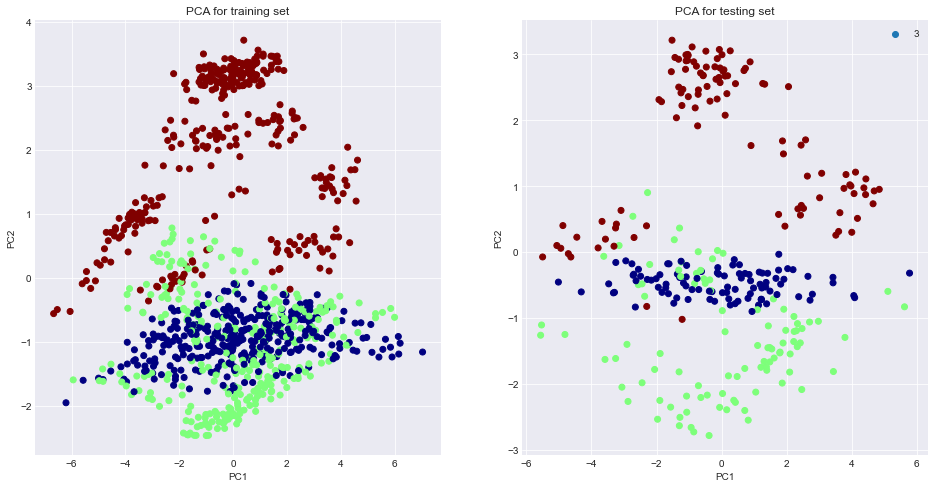

array([0.40612726, 0.21240399, 0.14558899, 0.07651945, 0.05952149,
       0.04403246, 0.01719424, 0.01395261, 0.00955503, 0.00895893,
       0.00320687, 0.00205016, 0.00088853])

In [7]:
pca = PCA()
pca1 = PCA()
Normalized_suffeled_training_set = StandardScaler().fit_transform(suffeled_training_set)
test_data_ = test_set.iloc[:,0:12]
test_data_extracted = StandardScaler().fit_transform(test_data_)
testing_PCA = pca1.fit_transform(test_data_extracted)
pca.fit(Normalized_suffeled_training_set)
suffeled_training_set_PCA = pca.transform(Normalized_suffeled_training_set)
suffeled_training_set.shape
suffeled_training_set_PCA.shape

colormap=np.array(['red','green','yellow']) 

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
     
plt.scatter(suffeled_training_set_PCA[:,0],suffeled_training_set_PCA[:,1],c=suffeled_training_set['L'], cmap='jet')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA for training set")


plt.subplot(1,2,2)


plt.scatter(testing_PCA[:,0],testing_PCA[:,1],c=test_set['L'],cmap='jet')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA for testing set")
plt.legend(suffeled_training_set['L'])
plt.show()
pca.explained_variance_ratio_  #variance explained

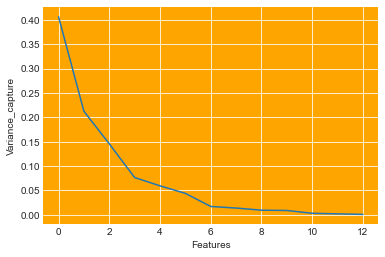

In [8]:
fig = plt.figure()
ax = plt.gca()
ax.set_facecolor("orange")
plt.xlabel('Features')
plt.ylabel('Variance_capture')
plt.plot(pca.explained_variance_ratio_)

## task 3 splitting Training set data in training set II and validation set

In [9]:


training_set_II, Validation_set = train_test_split(suffeled_training_set, test_size=0.3)

## Task  4: Investigate  how  the  number  of  features  in  the  training  dataset  affects  the  model performance on the validation set 

In [10]:

# Idea is to extract features by iteration for instance Feature f1 for 1 st iteration and feature f1,f2 for second iteration 
# and f1,f2,f3 for third iteration .........upto 12 itearion and writing a function to train linear regression model for each and
# every iteration and function returning MSE for test and validation set


# Function which returns Mean Square Error when provided with Train and Validation set
def train_and_predict(train_dataset,Validation_dataset,train_Lable,validation_Lable):
    sc = StandardScaler()
    lm = LinearRegression()

# code for training set for training an predicting labels

    
    y =  train_Lable
    X = train_dataset
    sc.fit(X)
    x_scaled =  sc.transform(X) #normalizing Training set
    lm.fit(x_scaled,y)  # training Linear regression model with training set
    lm.coef_
    y_predictions = np.round(lm.predict(x_scaled)) #Rounding predicted lable of Trainingset to nearest integer
    training_err = mean_squared_error(y_predictions, y) #MSE for training set
    


# code for Validation/Test set for predicting labels
    y_valid =  validation_Lable
    X_valid = Validation_dataset
    x_scaled_valid = sc.transform(X_valid) #normalizing Validation  set data
    y_predictions_valid = np.round(lm.predict(x_scaled_valid)) #Rounding predicted lable of validationset to nearest integer
    validation_err = mean_squared_error(y_predictions_valid, y_valid) #MSE for training set
    
    return training_err,validation_err






iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12


<AxesSubplot:>

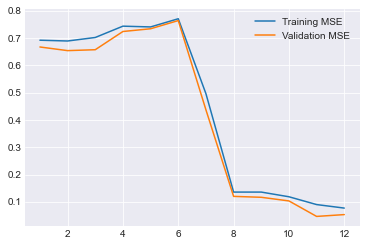

In [11]:
# Iterating using for loop and extracting features and lables as below
#for i=1,feature F1 are extracted from train,validation set and passed as parameters to train_and_predict function to calculate
#MSE
#for i=2,feature F1,F2 are extracted from train,validation set and passede as parameters to train_and_predict function to calculate
#MSE
#for i=3, feature F1,F2,F3 are extracted and above process is continued
# .
# .
# .
# .
# .
# .
# .
# .
# .
#for i=12, feature F1,F2,F3.......F12 are extracted from train,validation set and passede as parameters to train_and_predict function to calculate
#MSE




features_arr = np.array([])
training_error = np.array([])
validation_error = np.array([])



for i in range(1, 13, 1):
    print('iteration',i)
    dyn_features_addition_train = training_set_II.iloc[:, :i]
    
    
    dyn_features_addition_validation = Validation_set.iloc[:, :i]
    #dyn_features_addition_validation = Validation_set
    
    train_Lable = training_set_II['L'] #here extraction of label will happen for train set
    validation_Lable = Validation_set['L'] #here extraction of label will happen for validation set
    
     # below calcuation of MSE for training and test set will happen
    Training_MSE,validation_MSE  =train_and_predict(dyn_features_addition_train,dyn_features_addition_validation,train_Lable,validation_Lable)
    training_error=np.append(training_error,Training_MSE) #all the traininf set  MSE are feeded to single array
    validation_error=np.append(validation_error,validation_MSE) #all the validation set   MSE are feeded to single array
    
    features_arr =np.append(features_arr,i)
    
    
    
#ploting learning curve for both training and Validation set

sns.lineplot(x=features_arr,y=training_error , label="Training MSE")
sns.lineplot(x=features_arr,y=validation_error , label="Validation MSE")

In [12]:
    dyn_features_addition_train_all = suffeled_training_set.iloc[:, :12] # training model with 12 featured 
    dyn_features_addition_test = test_set.iloc[:, :12] 
    train_Lable = suffeled_training_set['L']
    Test_Lable = test_set['L']
    Training_MSE,Test_MSE  =train_and_predict(dyn_features_addition_train_all,dyn_features_addition_test,train_Lable,Test_Lable)
    print(Test_MSE)
    print(Training_MSE)

0.056666666666666664
0.073


# Task-5 

### Here for classification task we are using regression mode one issue is when we are rounding pridicted value to nearest integer therefore some values are rounded to 4 which is not a lable in test and training data because we only have 3 lables(1,2,3)
### I am using 12 features since Mean square error of test data is minimum  that is 0.056666

### Task 1 - As can be seen from the scatter plot, the data for class 3 points can be easily segregated in a two-dimensional space.

### Task 2 - 6 principal components are required to capture 90% of variance.

### Task 3 - The data is split into train and validation on training set with 70 and 30 percentage.

### to conclude, if we use  models like k-means predication will be better

